# Bharat Intern Internship
### Task - 1 Name: Stock Prediction

###Contribution - Individual

###Submitted by - Gaurav Katakwar

### Dataset Summery :
* This is a Dataset for the Stock prices for the stock of Google. It consists of 7 columns and a smaller subset of 4430 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

Date: The year,month and date of the stock data.

Close: The closing price of Google's stock on a particular day.

High: The highest value reached by Google's stock on the given day.

Low: The lowest value reached by Google's stock on the given day.

Open: The opening value of Google's stock on the given day.

Volume: The trading volume of Google's stock on the given day.

Adj Close: The adjusted closing price of Google's stock.


#Let's Begin !

##Know Your Data :

###Import Libraries :

In [24]:
# Import Libraries
import numpy as np                        #Python library used for working with arrays.
import pandas as pd                       #For data manipulation and analysis
import matplotlib                         #Embedding plots into applications
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                     #For statistical graphics plotting
from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional


###Dataset Loading :

In [25]:
# Load Dataset
df = pd.read_csv("/content/GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


###Dataset First View :

In [26]:
# Dataset First Look
df.head()        # Top 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


###Dataset Rows & Columns Count :

In [27]:
# Dataset Rows & Columns Count
df.shape

(4431, 7)

###Dataset Information :

In [28]:
df.info

<bound method DataFrame.info of             Date         Open         High          Low        Close  \
0     2004-08-19    50.050049    52.082081    48.028027    50.220219   
1     2004-08-20    50.555557    54.594597    50.300301    54.209209   
2     2004-08-23    55.430431    56.796799    54.579578    54.754753   
3     2004-08-24    55.675674    55.855858    51.836838    52.487488   
4     2004-08-25    52.532532    54.054054    51.991993    53.053055   
...          ...          ...          ...          ...          ...   
4426  2022-03-18  2668.489990  2724.879883  2645.169922  2722.510010   
4427  2022-03-21  2723.270020  2741.000000  2681.850098  2722.030029   
4428  2022-03-22  2722.030029  2821.000000  2722.030029  2797.360107   
4429  2022-03-23  2774.050049  2791.770020  2756.699951  2765.510010   
4430  2022-03-24  2784.000000  2832.379883  2755.010010  2831.439941   

        Adj Close    Volume  
0       50.220219  44659096  
1       54.209209  22834343  
2       54.75

In [29]:
# Checking for data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

###Duplicate Values :

In [30]:
df[df.duplicated()].shape

(0, 7)

In [31]:
#dataset columns
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

###Understanding Your Variables :

In [32]:
#Dataset Describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


###Missing Values/Null Values :

In [33]:
df.isnull().sum().sort_values(ascending=False)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [36]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

<ipython-input-36-ccb42c81a06d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype


,Open,Close
Date,,
2004-08-19,50.050049,50.220219
2004-08-20,50.555557,54.209209
2004-08-23,55.430431,54.754753
2004-08-24,55.675674,52.487488
2004-08-25,52.532532,53.053055
2004-08-26,52.527527,54.009010
2004-08-27,54.104103,53.128128
2004-08-30,52.692692,51.056057
2004-08-31,51.201202,51.236237


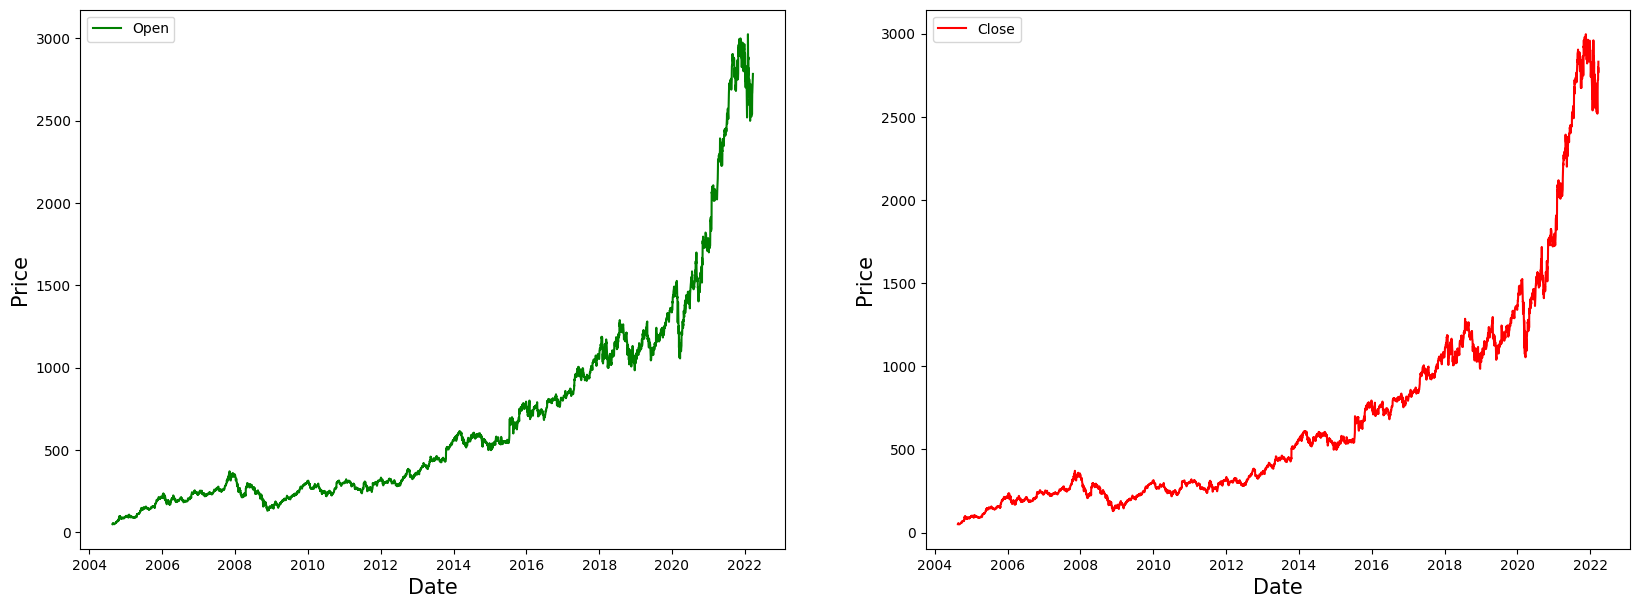

In [37]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [38]:
# Normalizing Values of columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

<ipython-input-38-13f737331982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = MMS.fit_transform(df)


,Open,Close
Date,,
2004-08-19,0.000136,0.000056
2004-08-20,0.000306,0.001410
2004-08-23,0.001945,0.001595
2004-08-24,0.002027,0.000825
2004-08-25,0.000971,0.001017
2004-08-26,0.000969,0.001342
2004-08-27,0.001499,0.001043
2004-08-30,0.001024,0.000340
2004-08-31,0.000523,0.000401


###Splitting Data into a Training set and a Test set :

In [43]:
train_data = df[:3333]
test_data  = df[3333:]

train_data.shape, test_data.shape

((3333, 2), (1098, 2))

In [44]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [45]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3283, 50, 2), (3283, 2), (1048, 50, 2), (1048, 2))

###CREATING LSTM MODEL :

In [46]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
103/103 [==============================] - 13s 69ms/step - loss: 0.0012 - mean_absolute_error: 0.0165 - val_loss: 7.5899e-04 - val_mean_absolute_error: 0.0196
Epoch 2/100
103/103 [==============================] - 8s 73ms/step - loss: 4.9514e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0012 - val_mean_absolute_error: 0.0241
Epoch 3/100
103/103 [==============================] - 7s 70ms/step - loss: 4.5982e-05 - mean_absolute_error: 0.0048 - val_loss: 0.0027 - val_mean_absolute_error: 0.0350
Epoch 4/100
103/103 [==============================] - 6s 62ms/step - loss: 4.1509e-05 - mean_absolute_error: 0.0046 - val_loss: 0.0025 - val_mean_absolute_error: 0.0337
Epoch 5/100
103/103 [==============================] - 10s 94ms/step - loss: 4.0169e-05 - mean_absolute_error: 0.0045 - val_loss: 0.0020 - val_mean_absolute_error: 0.0303
Epoch 6/100
103/103 [==============================] - 6s 62ms/step - loss: 3.6164e-05 - mean_absolute_error: 0.0043 - val_loss: 0.0014 - val_mean_a

In [48]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

33/33 [==============================] - 1s 17ms/step


array([[0.3846439 , 0.3895836 ],
       [0.3863132 , 0.39128327],
       [0.38594702, 0.39082828],
       [0.38273048, 0.38744324],
       [0.38529807, 0.39033198]], dtype=float32)

In [49]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1194.0969, 1198.0469],
       [1199.0637, 1203.0553],
       [1197.9741, 1201.7146],
       [1188.4038, 1191.7399],
       [1196.0433, 1200.2522]], dtype=float32)

###VISUALIZING ACTUAL VS PREDICTED DATA :

In [52]:
# Merging actual and predicted data for better visualization
Merge_df = pd.concat([df.iloc[-1048:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],
                                       index=df.iloc[-1048:].index)], axis=1)

In [53]:
# Inversing normalization/scaling
Merge_df[['Open','Close']] = MMS.inverse_transform(Merge_df[['Open','Close']])
Merge_df.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2018-01-26,1187.530029,1187.560059,1194.096924,1198.046875
2018-01-29,1188.000000,1186.479980,1199.063721,1203.055298
2018-01-30,1177.719971,1177.369995,1197.974121,1201.714600
2018-01-31,1183.810059,1182.219971,1188.403809,1191.739868
2018-02-01,1175.989990,1181.589966,1196.043335,1200.252197


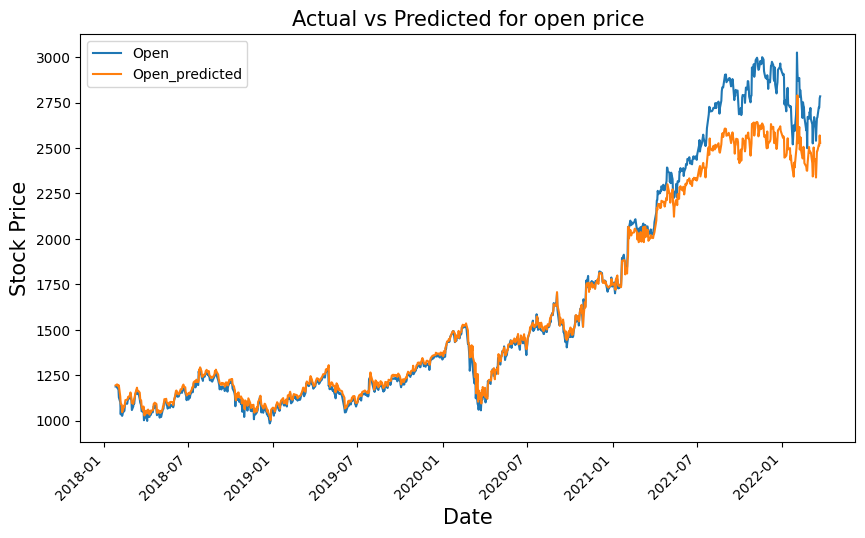

In [56]:
# plotting the actual open and predicted open prices on date index
Merge_df[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

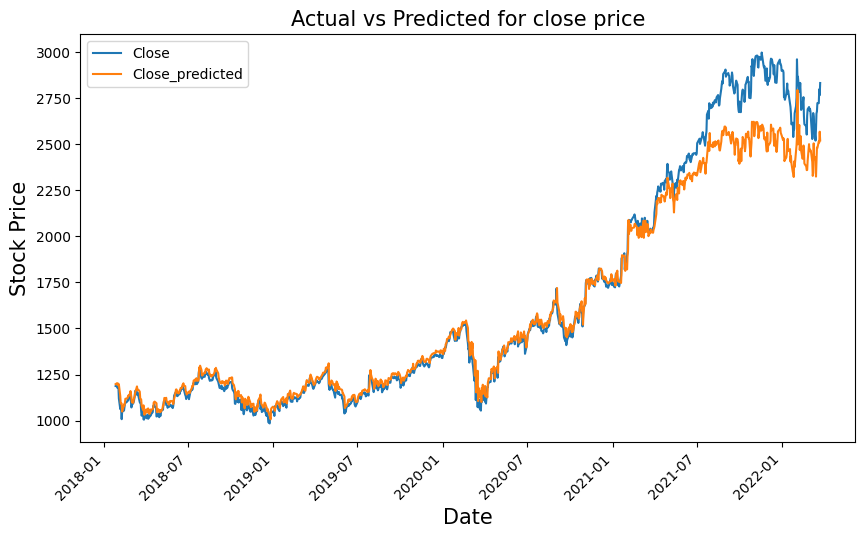

In [57]:
# plotting the actual close and predicted close prices on date index
Merge_df[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

### UPCOMING 15 DAYS PREDICTION:

In [58]:
# Creating a dataframe and adding 10 days to existing index

Merge_df = Merge_df.append(pd.DataFrame(columns=Merge_df.columns,
                                        index=pd.date_range(start=Merge_df.index[-1], periods=11, freq='D', closed='right')))
Merge_df['2022-02-01':'2022-02-15']

<ipython-input-58-2f1557289323>:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index=pd.date_range(start=Merge_df.index[-1], periods=11, freq='D', closed='right')))
<ipython-input-58-2f1557289323>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Merge_df = Merge_df.append(pd.DataFrame(columns=Merge_df.columns,


,Open,Close,Open_predicted,Close_predicted
2022-02-01,2751.889893,2752.879883,2501.848877,2491.792236
2022-02-02,3025.000000,2960.000000,2547.657959,2538.755615
2022-02-03,2914.110107,2861.800049,2789.638672,2793.564453
2022-02-04,2868.889893,2865.860107,2526.159424,2498.913574
2022-02-07,2885.000000,2784.020020,2615.458496,2603.625732
2022-02-08,2780.530029,2787.979980,2491.256592,2468.032227
2022-02-09,2819.270020,2831.840088,2514.638916,2497.925293
2022-02-10,2794.070068,2772.399902,2557.587402,2543.228516
2022-02-11,2772.000000,2685.649902,2485.258545,2463.547607
2022-02-14,2665.129883,2710.520020,2442.334229,2420.506348


In [61]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=Merge_df.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [62]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 34ms/step


In [64]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

In [ ]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(Merge_df.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()